# Analysis

In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [292]:
sns.set(rc={'figure.figsize':(10,7)})
plt.style.use('seaborn-whitegrid')

In [754]:
year = 'model_new'

## Data preparation

In [755]:
f = uproot.pandas.iterate("../outputs/"+year+"/trees/*.root", "t", reportpath = True,
                          branches=['beam_energy', 'mass', 'trigger', 'procedure'])

In [756]:
dataRAW = pd.concat([j.assign(name=float(re.findall(r"\d+\.\d+", path)[0])) for path,j in f])

In [757]:
dataRAW.sort_values(by='name', ascending=True, inplace=True);

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö `name` –≤ `data` –¥–æ–ª–∂–Ω–æ —Å–æ–≤–ø–∞–¥–∞—Ç—å —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Ç–æ—á–µ–∫ –≤ —Å–µ–∑–æ–Ω–µ

* 11 –≥–æ–¥: 40 —Ç–æ—á–µ–∫
* 12 –≥–æ–¥: 16 —Ç–æ—á–µ–∫
* 17 –≥–æ–¥: 34 —Ç–æ—á–∫–∏
* 19 –≥–æ–¥: 44 —Ç–æ—á–∫–∏
* –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ: 38 —Ç–æ—á–µ–∫

In [758]:
print("Checking:", len(dataRAW.name.unique()), 'different names in', year, 'season')

Checking: 38 different names in model_new season


–ü—Ä–æ–≤–µ—Ä–∫–∞ —Ç–∏–ø–æ–≤ –ø–æ–ª–µ–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞

In [759]:
dataRAW.dtypes

beam_energy    float64
mass           float64
trigger          int32
procedure        int32
name           float64
dtype: object

–ü—Ä–æ–≤–µ—Ä–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [760]:
dataRAW.describe()

beam_energy          mass       trigger    procedure          name
count  62520.000000  62520.000000  62520.000000  62520.00000  62520.000000
mean     794.440979    485.246469      1.667163      2.25048    794.440979
std      122.374331     79.957691      0.753575      0.48939    122.374331
min      550.000000     -1.000000     -1.000000      1.00000    550.000000
25%      712.500000    492.421928      2.000000      2.00000    712.500000
50%      825.000000    497.737854      2.000000      2.00000    825.000000
75%      887.500000    502.998238      2.000000      3.00000    887.500000
max     1000.000000    577.296082      2.000000      3.00000   1000.000000

–ü—Ä–æ–≤–µ—Ä–∏—Ç—å —Ç—Ä–∏–≥–≥–µ—Ä

In [761]:
bad_trig = dataRAW.query('trigger<0')
print('Energy points with bad trigger:\n', bad_trig.name.value_counts())

Energy points with bad trigger:
 550.0     45
825.0     38
562.5     35
587.5     28
612.5     25
837.5     21
875.0     21
625.0     19
862.5     19
850.0     19
600.0     15
812.5     14
762.5     14
787.5     14
575.0     14
650.0     14
925.0     13
887.5     12
912.5     12
662.5     11
800.0     10
900.0      9
750.0      9
775.0      9
700.0      8
637.5      8
962.5      8
945.0      7
675.0      7
687.5      7
950.0      6
725.0      6
935.0      6
737.5      6
975.0      5
712.5      5
1000.0     5
987.5      4
Name: name, dtype: int64


–ü—Ä–æ–≤–µ—Ä–∏—Ç—å —ç–Ω–µ—Ä–≥–∏–∏

In [762]:
bad_en = dataRAW.query('beam_energy<0')
print('Bad energy records:', bad_en.name.shape[0])

Bad energy records: 0


–£–¥–∞–ª–∏—Ç—å —Å–æ–±—ã—Ç–∏—è —Å –ø–ª–æ—Ö–∏–º —Ç—Ä–∏–≥–≥–µ—Ä–æ–º –∏ —ç–Ω–µ—Ä–≥–∏—è–º–∏ (–Ω–µ –≤ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–∏)

In [763]:
data = dataRAW if 'model' in year else dataRAW.query('trigger>-1&beam_energy>0')

–û—Å—Ç–∞–≤–∏—Ç—å —Ç–æ–ª—å–∫–æ –º–∞—Å—Å—ã –≤–Ω—É—Ç—Ä–∏ –æ–∫–Ω–∞ (450,550) –∏ –±–µ–∑ –ø—Ä–æ—Ü–µ–¥—É—Ä—ã kinfit

In [764]:
data = data.query('mass>450&mass<550&procedure!=1')

In [765]:
print(data.shape[0], 'records left')

60676 records left


–£–¥–∞–ª–∏—Ç—å –Ω–µ–Ω—É–∂–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã

In [766]:
data.drop('procedure', axis=1, inplace=True)

/home/nikitap/programs/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [767]:
data.head()

beam_energy        mass  trigger   name
1618        550.0  489.028839        2  550.0
1639        550.0  501.318237        2  550.0
1640        550.0  473.089111        2  550.0
1641        550.0  501.844910        2  550.0
1642        550.0  501.702667        2  550.0

–î–æ–±–∞–≤–∏—Ç—å —Å–≤–µ—Ç–∏–º–æ—Å—Ç–∏

In [768]:
lum = pd.read_csv(f'../inputs/{year}/lum.dat')
lum.rename({'label': 'name'}, axis=1, inplace=True)
if 'err' in lum.columns:
    lum.drop(['err'], axis=1, inplace=True) #–æ—à–∏–±–∫–∞ —Å–≤–µ—Ç–∏–º–æ—Å—Ç–µ–π —É—Ö–æ–¥–∏—Ç –≤ —Å–∏—Å—Ç–µ–º–∞—Ç–∏–∫—É
    
lum = lum.sort_values(by='name')

In [769]:
lum.tail()

name   lum
33   950.0  5294
34   962.5  4667
35   975.0  4112
36   987.5  3640
37  1000.0  3361

–ü—Ä–æ–≤–µ—Ä–∏—Ç—å –¥–∞–Ω–Ω—ã–µ (—Ö–æ—Ä–æ—à–æ, –µ—Å–ª–∏ —á–∏—Å–ª–∞ —Å–æ–≤–ø–∞–¥–∞—é—Ç)

–ï—Å–ª–∏ –Ω–µ —Å–æ–≤–ø–∞–¥–∞—é—Ç, —Ç–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —Å–≤–µ—Ç–∏–º–æ—Å—Ç–∏ –Ω–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã

In [770]:
print('Records in  lum:', lum.shape[0])
print('Records in data:', data.name.unique().shape[0])

Records in  lum: 38
Records in data: 38


–û–±—ä–µ–¥–∏–Ω–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –∏ —Å–≤–µ—Ç–∏–º–æ—Å—Ç—å

In [771]:
data_prep = lum.merge(data, on='name')

In [772]:
def check_foo(data1, data2):
    if(data1.shape[0] == data2.shape[0]):
        print("Good.", data1.shape[0], 'rows' )
    else:
        print("WARNING. frames haven't equal shape |", data1.shape[0], 'vs', data2.shape[0], 'records')
    return

In [773]:
check_foo(data_prep, data)

Good. 60676 rows


–°–º–æ—Ç—Ä–∏–º, –≤ –∫–∞–∫–∏—Ö –∏–º–µ–Ω–Ω–æ —Ç–æ—á–∫–∞—Ö –Ω–µ —Å–æ–≤–ø–∞–¥–∞—é—Ç `data` –∏ `lum`

In [774]:
set1 = set(data.name.unique())
set2 = set(lum.name.unique())

(set1|set2).difference(set1&set2)

set()

### Pictures

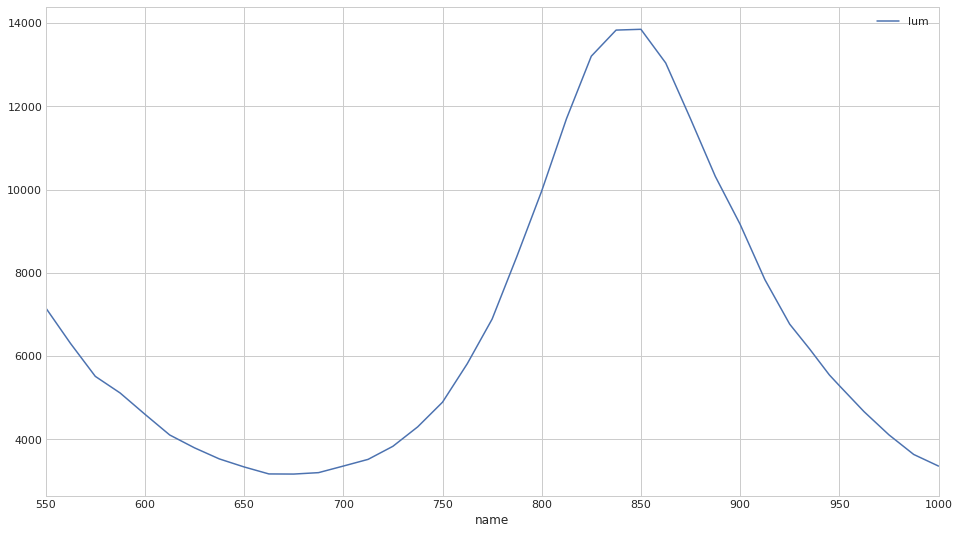

In [775]:
lum.plot(x='name', y='lum')

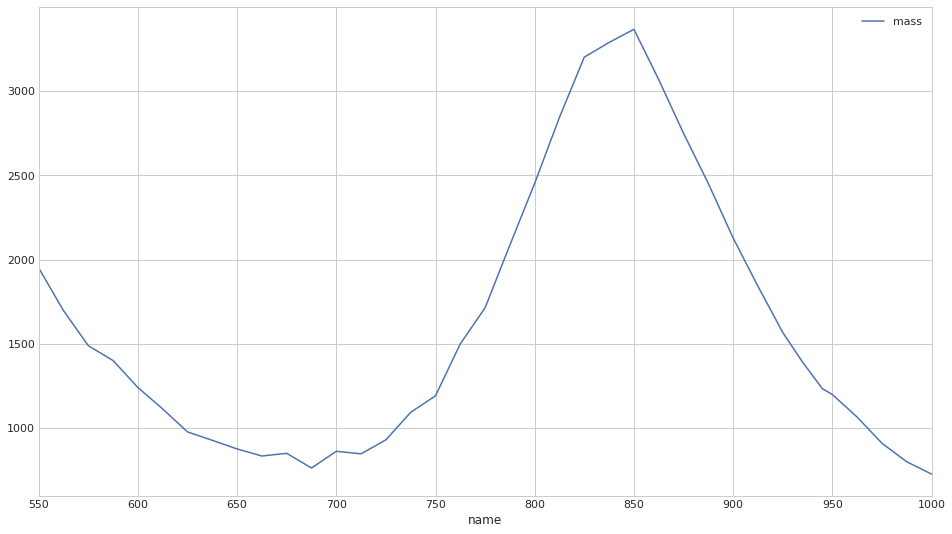

In [776]:
data_prep.groupby('name').agg({'mass':np.size}).plot()

In [777]:
data_prep.groupby('name').agg({'mass':np.size})

mass
name          
550.0   1951.0
562.5   1698.0
575.0   1490.0
587.5   1402.0
600.0   1242.0
612.5   1115.0
625.0    979.0
637.5    929.0
650.0    878.0
662.5    836.0
675.0    852.0
687.5    765.0
700.0    864.0
712.5    849.0
725.0    932.0
737.5   1095.0
750.0   1193.0
762.5   1501.0
775.0   1715.0
787.5   2087.0
800.0   2453.0
812.5   2845.0
825.0   3201.0
837.5   3288.0
850.0   3366.0
862.5   3068.0
875.0   2750.0
887.5   2452.0
900.0   2129.0
912.5   1843.0
925.0   1569.0
935.0   1393.0
945.0   1235.0
950.0   1201.0
962.5   1067.0
975.0    912.0
987.5    802.0
1000.0   729.0

–°–ª–∏—è–Ω–∏–µ —Ç–æ—á–µ–∫

In [778]:
cnct = []
if year=='11':
    cnct = [([887.5, 900., 912.5, 925., 935.], 910), ([945., 950., 962.5, 975., 987.5, 1000.], 950)] #11year
if year=='12':
    cnct = [([900., 920., 936.], 920), ([950., 960., 970.,], 950), ([ 980., 990], 960)] #12 year
if year=='17':
    cnct = [([880., 890.], 885), ([900., 910.], 905), ([920., 930.], 925),
           ([937.4, 937.5, 938.3, 938.9, 939.6, 940.2, 940.8], 939)] #17 year
#     cnct = [([880., 890., 900., 910.], 900), ([920., 930., 936., 937.5], 935),
#             ([937.4, 938.3, 938.9], 938), ([939.6, 940.2, 940.8], 940),
#             ([942., 950., 960., 971.], 960), ([981., 990, 1003.5],990)] #17 year
# if year=='19': #–≤ –ø–æ—Å–ª–µ–¥–Ω–∏–π —Ä–∞–∑ –Ω–µ —Å–ª–∏–≤–∞–ª —Ç–æ—á–∫–∏
#     cnct = [([862.5, 875.0, 887.5, 900.0, 912.5, 925], 875),([936, 945.0, 950.0, 951.1, 955.0, 962.5], 955),
#             ([975., 978.0, 987.5], 980)] #19year

In [779]:
for c in cnct:
    data_prep.name.replace(c[0], c[1], inplace=True)

OK, points have been merged

In [780]:
data_prep.tail()

name   lum  beam_energy        mass  trigger
60671  1000.0  3361       1000.0  493.645874        2
60672  1000.0  3361       1000.0  515.456543        2
60673  1000.0  3361       1000.0  503.058228        2
60674  1000.0  3361       1000.0  505.442688        2
60675  1000.0  3361       1000.0  496.942139        2

In [781]:
check_foo(data_prep, data)

Good. 60676 rows


### –ü–µ—Ä–µ—Å—á–∏—Ç–∞—Ç—å —Å–≤–µ—Ç–∏–º–æ—Å—Ç–∏ –≤ —Å–ª–∏—Ç—ã—Ö —Ç–æ—á–∫–∞—Ö

In [782]:
data_prep['lume'] = data_prep.beam_energy*data_prep.lum

–ü—Ä–æ–≤–µ—Ä–∏—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ—Å—Ç—å —Å–ª–∏—è–Ω–∏—è

In [783]:
#—á–∏—Å–ª–æ –≤ –ø–æ–ª–µ lum —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ —Å–ø–∏—Å–∫–µ –¥–ª—è —Å–ª–∏—è–Ω–∏—è
data_prep[['lum', 'name']].\
drop_duplicates(subset=['name','lum']).groupby('name').agg({'lum':np.size}).query('lum!=1')

Empty DataFrame
Columns: [lum]
Index: []

In [784]:
new_lum = data_prep[['beam_energy', 'lum', 'lume', 'name']].drop_duplicates(subset=['lum','name']).\
groupby('name').agg({'lume':[np.sum], 'lum':[np.sum], 'beam_energy':[np.min, np.max]})

In [785]:
new_lum.shape

(38, 4)

In [786]:
new_lum['Emean'] = np.round( new_lum[('lume','sum')]/new_lum[('lum','sum')], 2)

In [787]:
new_lum.columns = ['lume', 'lum', 'dEmin', 'dEmax', 'Emean']
new_lum.drop('lume', axis=1, inplace=True)
new_lum['dEmax'] = np.abs( np.round( new_lum.dEmax-new_lum.Emean, 2) )
new_lum['dEmin'] = np.abs( np.round( new_lum.Emean - new_lum.dEmin, 2) )

In [788]:
#data.loc[641.].beam_energy.std()

In [789]:
new_lum.query('dEmin>0')

Empty DataFrame
Columns: [lum, dEmin, dEmax, Emean]
Index: []

I have got new luminosity table.

Now I should join it to existing table

In [790]:
data_prep.drop(['lume', 'lum', 'beam_energy'], axis=1, inplace=True)

In [791]:
final_data = data_prep.join(new_lum, how='inner', on='name')

In [792]:
check_foo(final_data, data_prep)

Good. 60676 rows


That is good. Now I should do the analysis

In [793]:
final_data.tail()

name        mass  trigger   lum  dEmin  dEmax   Emean
60671  1000.0  493.645874        2  3361    0.0    0.0  1000.0
60672  1000.0  515.456543        2  3361    0.0    0.0  1000.0
60673  1000.0  503.058228        2  3361    0.0    0.0  1000.0
60674  1000.0  505.442688        2  3361    0.0    0.0  1000.0
60675  1000.0  496.942139        2  3361    0.0    0.0  1000.0

----------------
## Fit

In [794]:
data2 = final_data.groupby('name')

In [795]:
dic = {}
for i in data2.groups:
    print(i)
    dic[i] = np.array( data2.get_group(i)['mass'] )

550.0
562.5
575.0
587.5
600.0
612.5
625.0
637.5
650.0
662.5
675.0
687.5
700.0
712.5
725.0
737.5
750.0
762.5
775.0
787.5
800.0
812.5
825.0
837.5
850.0
862.5
875.0
887.5
900.0
912.5
925.0
935.0
945.0
950.0
962.5
975.0
987.5
1000.0


In [796]:
import iminuit
import probfit as pf

In [797]:
plt.rcParams.update({'font.size': 18, 'figure.figsize':(16,9)})

In [798]:
mass_bound = (450, 550)

In [799]:
#2 –≥–∞—É—Å—Å–∞
def constant(x):
    return 1
def two_gauss(x, mu, sigma1, sigma2, frac):
    return frac*pf.gaussian(x, mu, sigma1) + (1-frac)*pf.gaussian(x, mu, sigma2)

norm_sig = pf.rename( pf.Normalized( two_gauss, mass_bound ), ['x', 'M', '$\sigma1$', '$\sigma2$', 'f'] )
norm_bkg = pf.Normalized( constant, mass_bound )

ext_sig = pf.Extended(norm_sig, extname='$N_{sig}$')
ext_bkg = pf.Extended(norm_bkg, extname='$N_{bkg}$')

pdf = pf.AddPdf(ext_sig, ext_bkg)

MLim = (498.1, 5.0)
sigma1Lim = (6.7, 5.0)
sigma2Lim = (10., 0)
fLim = (1, 0)

# 11: ùúé1=(4.49, 0.27) , ùúé2=(10.1, 1.), ùëì=(0.68, 0.07), M=(497.299, 0.098)
# 12: ùúé1=(5.26, 0.30) , ùúé2=(14.42, 3.87), ùëì=(0.86, 0.06), M=(498.33, 0.27)
# mod_old: ùúé1=(5.43, 0.10) , ùúé2=(12.68, 0.25), ùëì=(0.58, 0.02), M=(497.05, 0.04)
# mod_new: ùúé1=(5.35, 0.07) , ùúé2=(12.74, 0.17), ùëì=(0.57, 0.02), M=(498.00, 0.03)
limits = {
    "limit_M": [MLim[0]-MLim[1], MLim[0]+MLim[1]],
    "limit_$\sigma1$": [sigma1Lim[0] - sigma1Lim[1], sigma1Lim[0] + sigma1Lim[1]],
    "limit_$\sigma2$": [sigma2Lim[0] - sigma2Lim[1], sigma2Lim[0] + sigma2Lim[1]],
    "limit_$N_{sig}$": [0, 100000],
    "limit_$N_{bkg}$": [0, 2000],
    "limit_f": [fLim[0]-fLim[1], fLim[0]+fLim[1]]
}
errors = {
    "error_M": 1,
    "error_$\sigma1$": 0.1,
    "error_$\sigma2$": 0.,
    "error_$N_{sig}$": 0.3,
    "error_$N_{bkg}$": 0.1,
    "error_f": 0.
}

pf.describe(pdf)

['x', 'M', '$\\sigma1$', '$\\sigma2$', 'f', '$N_{sig}$', '$N_{bkg}$']

In [803]:
def fitter(dic, nbins, energy, binnedLik=False, simple_plot=True):
    
    likelihood = pf.UnbinnedLH(pdf, dic, extended=True, extended_bound=mass_bound) if not(binnedLik) else \
    pf.BinnedLH(pdf, dic, int(nbins*(mass_bound[1]-mass_bound[0])/100.), bound=mass_bound, extended=True)
    
    initial_par_values = {"M": 497.6, "$\sigma1$": 4.26, "$N_{sig}$": np.size(dic),
                          "$\sigma2$": 11.16, "f": 0.5, "$N_{bkg}$": 1}
    mt = iminuit.Minuit(likelihood, **initial_par_values, **errors, **limits, pedantic=False)
    mt.migrad();
        
    if simple_plot:
        likelihood.draw(minuit=mt) if binnedLik else likelihood.draw(minuit=mt, bins=nbins, bound=mass_bound)
    else:
        fig = plt.figure(figsize=(16, 10), dpi= 80)
        grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

        # Define the axes
        ax_main = fig.add_subplot(grid[:-1, :])
        ax_main.grid(ls=':')
        box_1 = {'facecolor':'black', 'boxstyle': 'round'}

        if binnedLik:
            likelihood.draw(minuit=mt, print_par=True);
        else:
            likelihood.draw(minuit=mt, bins=nbins, bound=mass_bound, print_par=True)

        plt.tick_params(labelsize=20);
        plt.xlabel('invariant mass, MeV', fontsize=20)
        plt.ylabel('number of events', fontsize=20)

        # this is an inset axes over the main axes
        ax_bottom = fig.add_subplot(grid[-1, :], xticklabels=[])
        ax_bottom.grid(ls=':')
        likelihood.draw_residual(minuit=mt) if binnedLik else \
        likelihood.draw_residual(minuit=mt, bins=nbins, bound=mass_bound)
    
        plt.savefig(f'../outputs/{year}/figures/fit_e{energy}.pdf')
    return mt, likelihood

In [804]:
itr = iter(dic)

In [805]:
fit_frame = pd.DataFrame(columns=[ 'M', 'S1', 'S2', 'f', 'N', 'C', 
                                  'Merr', 'S1err', 'S2err', 'ferr', 'Nerr', 'Cerr'])

In [806]:
i = next(itr)
print('Label:', i)

Label: 550.0


Migrad quality: True
Real: 1951 Found: 1951.0546011177337


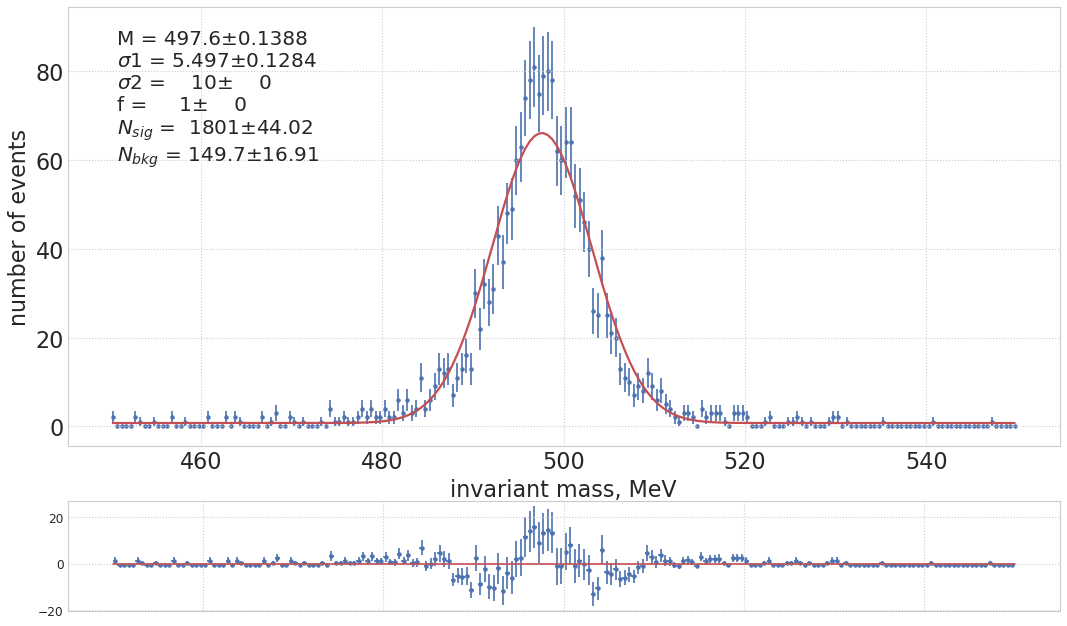

In [807]:
dicx = dic[i]#final_data.mass.values#dic[i]#
# dicx = np.hstack((dic[862.5],dic[887.5],dic[900]))
mt, lik = fitter(dicx, 200, i, False, False)
fit_frame.loc[i] = mt.values.values() + mt.errors.values()
print("Migrad quality:", mt.migrad_ok())
print( 'Real:', np.size(dicx), 'Found:', mt.values['$N_{sig}$'] + mt.values['$N_{bkg}$'] )

In [721]:
fit_frame.tail(20)

M         S1    S2    f           N          C      Merr  \
name                                                                       
800.0  497.209899   8.300000  10.0  1.0  257.442851  44.556088  0.601053   
812.5  497.201776   8.080625  10.0  1.0  383.189855  36.799837  0.451128   
825.0  497.933036   7.871771  10.0  1.0  281.110019  24.874500  0.515703   
837.5  497.090216   8.100000  10.0  1.0  141.654552  12.351760  0.752630   
850.0  497.938786   6.783533  10.0  1.0   68.873023  23.135388  0.976194   
862.5  498.629996   6.330000  10.0  1.0   25.404213  19.601118  0.057569   
875.0  500.656159   6.700000  10.0  1.0   28.411684  20.588947  2.350814   
887.5  498.629878   6.330000  10.0  1.0   11.502657  14.496969  0.056699   
900.0  498.570000   6.330000  10.0  1.0    9.217894   6.782788  0.046408   
912.5  498.070001   5.900000  10.0  1.0    5.492667  14.521579  0.042774   
925.0  498.130000   5.900000  10.0  1.0   12.845793   7.174714  0.035997   
936.0  498.070000   5.900000  10.0  1.0   22.068434  18.926868  0.030383   
945.0  497.601238   7.550000  10.0  1.0   26.390406  22.613748  2.007844   
950.0  503.099998  10.000000  10.0  1.0   17.811294  13.188951  6.491137   
951.1  502.722855  10.000000  10.0  1.0   28.524704  17.465813  5.641618   
955.0  502.537466  10.000000  10.0  1.0   17.742746  11.256963  5.841605   
962.5  502.560316  10.000000  10.0  1.0   31.065310   9.935454  5.081122   
975.0  501.590904  10.000000  10.0  1.0   48.085055  36.966080  1.766444   
978.0  503.100000  10.000000  10.0  1.0    4.147347   2.852656  9.995655   
987.5  502.228399  10.000000  10.0  1.0   38.860393  16.139659  1.835902   

          S1err  S2err  ferr       Nerr      Cerr  
name                                               
800.0  0.100000    0.0   0.0  17.429929  9.534041  
812.5  0.414326    0.0   0.0  20.921169  9.554107  
825.0  0.546761    0.0   0.0  18.325343  8.918627  
837.5  0.100000    0.0   0.0  12.560748  5.334202  
850.0  1.282834    0.0   0.0  10.144322  7.558918  
862.5  0.100000    0.0   0.0   5.826216  5.304643  
875.0  0.100000    0.0   0.0   6.930951  6.340460  
887.5  0.100000    0.0   0.0   4.165385  4.510513  
900.0  0.100000    0.0   0.0   3.370235  2.986996  
912.5  0.100000    0.0   0.0   3.345966  4.495629  
925.0  0.100000    0.0   0.0   3.999066  3.211064  
936.0  0.100000    0.0   0.0   5.376740  5.075671  
945.0  0.100000    0.0   0.0   6.304272  5.995790  
950.0  0.100000    0.0   0.0   5.591026  5.160565  
951.1  0.100000    0.0   0.0   6.451670  5.528713  
955.0  0.100000    0.0   0.0   5.370259  4.727419  
962.5  0.100000    0.0   0.0   6.546232  4.660358  
975.0  0.100000    0.0   0.0   8.556368  7.876498  
978.0  0.100000    0.0   0.0   2.741606  2.495717  
987.5  0.100000    0.0   0.0   7.475973  5.758659

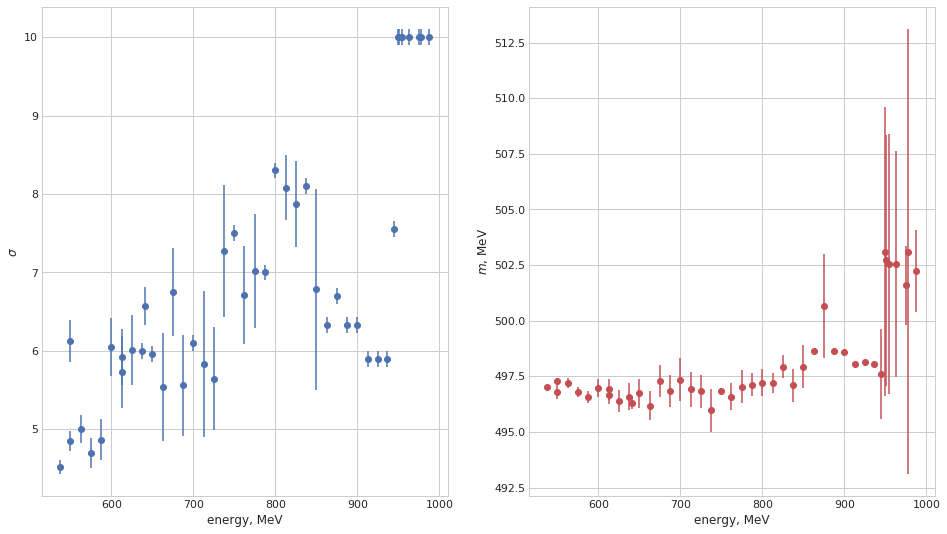

In [722]:
plt.subplot(1, 2, 1)
plt.errorbar(data=fit_frame, x=fit_frame.index, y='S1', yerr='S1err', fmt='o')
plt.xlabel('energy, MeV');
plt.ylabel('$\\sigma$');
plt.subplot(1, 2, 2)

plt.errorbar(x=fit_frame.index, y=fit_frame.M, yerr=fit_frame.Merr, fmt='or')
plt.xlabel('energy, MeV');
plt.ylabel('$m$, MeV');

### Some notes:
none

## –ê–Ω–∞–ª–∏–∑ $\sigma$

### 19 –≥–æ–¥

–í —Ç–æ—á–∫–∞—Ö 550 –∏ 550.1 –ø—Ä–∏–Ω—Ü–∏–ø–∏–∞–ª—å–Ω–æ —Ä–∞–∑–ª–∏—á–∞–µ—Ç—Å—è —à–∏—Ä–∏–Ω–∞ ( 4.8 vs 6.12 )

–í 19 –≥–æ–¥—É –≤–∑—è–ª –≥—Ä—É–ø–ø–∞–º–∏ —Ç–æ—á–∫–∏ –ø–æ —ç–Ω–µ—Ä–≥–∏–∏ –∏ –ø–æ—Å–º–æ—Ç—Ä–µ–ª –∏—Ö $\sigma$, –≤–∏–¥–Ω–æ, —á—Ç–æ —à–∏—Ä–∏–Ω–∞ —Ä–∞—Å—Ç—ë—Ç –≤–º–µ—Å—Ç–µ —Å —ç–Ω–µ—Ä–≥–∏–µ–π

In [634]:
np.round(fit_frame.S1err.values, 2)

array([0.13, 0.16, 0.16, 0.18, 0.19, 0.25, 0.21, 0.23, 0.26, 0.28, 0.31,
       0.31, 0.31, 0.32, 0.32, 0.3 , 0.31, 0.29, 0.25, 0.25, 0.21, 0.2 ,
       0.21, 0.2 , 0.2 , 0.21, 0.24, 0.27, 0.31, 0.47, 0.44, 0.42, 0.59,
       0.55, 0.56, 0.66, 0.75, 0.25])

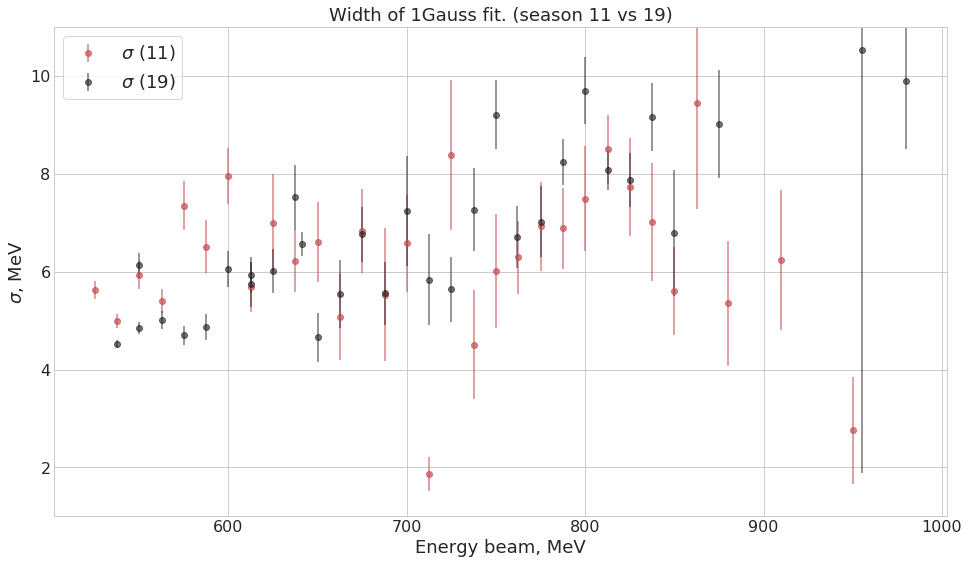

In [651]:
en19_an  = [537.5, 550. , 550.1, 562.5, 575. , 587.5, 600. , 612.5, 612.6,
       625. , 637.5, 641. , 650. , 662.5, 675. , 687.5, 700. , 712.5,
       725. , 737.5, 750. , 762. , 775. , 787.5, 800. , 812.5, 825. ,
       837.5, 850. , 875. , 955. , 980. ]
sigma19_an = [ 4.52,  4.85,  6.13,  5.01,  4.7 ,  4.87,  6.05,  5.74,  5.93,
        6.02,  7.52,  6.57,  4.66,  5.54,  6.76,  5.56,  7.24,  5.83,
        5.64,  7.27,  9.21,  6.71,  7.02,  8.25,  9.7 ,  8.08,  7.87,
        9.16,  6.79,  9.02, 10.53,  9.9 ]
dsigma19_an = [0.09, 0.13, 0.26, 0.18, 0.19, 0.26, 0.37, 0.46, 0.36, 0.45, 0.67,
       0.24, 0.5 , 0.69, 0.56, 0.64, 1.13, 0.93, 0.66, 0.84, 0.71, 0.63,
       0.73, 0.47, 0.69, 0.41, 0.55, 0.7 , 1.28, 1.1 , 8.64, 1.39]

enMC_an = [ 550. ,  562.5,  575. ,  587.5,  600. ,  612.5,  625. ,  637.5,
        650. ,  662.5,  675. ,  687.5,  700. ,  712.5,  725. ,  737.5,
        750. ,  762.5,  775. ,  787.5,  800. ,  812.5,  825. ,  837.5,
        850. ,  862.5,  875. ,  887.5,  900. ,  912.5,  925. ,  935. ,
        945. ,  950. ,  962.5,  975. ,  987.5, 1000. ]
sigmaMC_an = [5.5 , 5.87, 5.98, 6.3 , 6.23, 6.79, 6.33, 7.3 , 7.29, 7.54, 7.32,
       7.12, 7.39, 7.85, 7.59, 7.94, 7.64, 8.14, 7.99, 8.52, 8.4 , 8.44,
       8.51, 8.3 , 8.73, 8.77, 8.87, 8.3 , 8.95, 8.55, 9.21, 8.9 , 9.25,
       8.94, 9.4 , 9.67, 8.87, 8.95]
dsigmaMC_an = [0.12, 0.15, 0.17, 0.17, 0.21, 0.2 , 0.25, 0.29, 0.26, 0.34, 0.27,
       0.24, 0.32, 0.27, 0.33, 0.27, 0.23, 0.24, 0.23, 0.2 , 0.19, 0.18,
       0.15, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.23, 0.28, 0.24, 0.3 ,
       0.26, 0.29, 0.37, 0.36, 0.36]

enMCold_an = [ 550. ,  562.5,  575. ,  587.5,  600. ,  612.5,  625. ,  637.5,
        650. ,  662.5,  675. ,  687.5,  700. ,  712.5,  725. ,  737.5,
        750. ,  762.5,  775. ,  787.5,  800. ,  812.5,  825. ,  837.5,
        850. ,  862.5,  875. ,  887.5,  900. ,  912.5,  925. ,  935. ,
        945. ,  950. ,  962.5,  975. ,  987.5, 1000. ]
sigmaMCold_an = [ 5.85,  6.39,  6.24,  6.99,  6.54,  6.85,  6.17,  7.27,  7.29,
        7.7 ,  7.3 ,  7.76,  7.34,  7.22,  7.45,  7.84,  8.52,  8.05,
        8.02,  8.09,  8.5 ,  8.39,  8.54,  8.37,  9.37,  8.94,  9.12,
        8.72,  8.85,  8.73,  8.95,  9.16,  8.8 ,  9.12, 10.23,  9.56,
        9.83, 10.53]
dsigmaMCold_an = [0.13, 0.16, 0.16, 0.18, 0.19, 0.25, 0.21, 0.23, 0.26, 0.28, 0.31,
       0.31, 0.31, 0.32, 0.32, 0.3 , 0.31, 0.29, 0.25, 0.25, 0.21, 0.2 ,
       0.21, 0.2 , 0.2 , 0.21, 0.24, 0.27, 0.31, 0.47, 0.44, 0.42, 0.59,
       0.55, 0.56, 0.66, 0.75, 0.25]

en11_an = [525. , 537.5, 550. , 562.5, 575. , 587.5, 600. , 612.5, 625. ,
       637.5, 650. , 662.5, 675. , 687.5, 700. , 712.5, 725. , 737.5,
       750. , 762.5, 775. , 787.5, 800. , 812.5, 825. , 837.5, 850. ,
       862.5, 880. , 910. , 950. ]
sigma11_an = [5.63, 4.99, 5.93, 5.4 , 7.35, 6.51, 7.95, 5.69, 6.99, 6.22, 6.6 ,
       5.07, 6.83, 5.53, 6.58, 1.87, 8.38, 4.51, 6.01, 6.29, 6.93, 6.89,
       7.49, 8.5 , 7.73, 7.02, 5.61, 9.45, 5.35, 6.24, 2.76]
dsigma11_an = [0.18, 0.15, 0.28, 0.25, 0.5 , 0.54, 0.57, 0.51, 1.01, 0.63, 0.82,
       0.88, 0.85, 1.36, 0.99, 0.35, 1.53, 1.12, 1.16, 0.74, 0.91, 0.83,
       1.07, 0.7 , 1.01, 1.21, 0.9 , 2.16, 1.27, 1.43, 1.09]

df_sigma_an = pd.DataFrame({'emin':emin_an, 'emax':emax_an, 'sigma':sigma_an, 'ds': dsigma_an})
df_sigma_an['emean'] = (df_sigma_an.emin + df_sigma_an.emax)/2.
df_sigma_an['deup'] = df_sigma_an.emean - df_sigma_an.emin
# plt.errorbar(x=enMC_an, y=sigmaMC_an, yerr=dsigmaMC_an, fmt='o', alpha=0.8, label='$\sigma$ (MC)')
# plt.errorbar(x=enMCold_an, y=sigmaMCold_an, yerr=dsigmaMCold_an, alpha=0.8, fmt='oc', label='$\sigma$ (MC_old)')
plt.errorbar(x=en11_an, y=sigma11_an, yerr=dsigma11_an, fmt='or', alpha=0.7, label='$\sigma$ (11)')
plt.errorbar(x=en19_an, y=sigma19_an, yerr=dsigma19_an, fmt='ok', alpha=0.6, label='$\sigma$ (19)')
plt.legend(fontsize=18, frameon=True);
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.ylim(1, 11)
plt.xlabel('Energy beam, MeV', fontsize=18);
plt.ylabel('$\sigma$, MeV', fontsize=18);
plt.title('Width of 1Gauss fit. (season 11 vs 19)', fontsize=18);
plt.savefig('sigma3.pdf')

–í–æ–∑–Ω–∏–∫–∞–µ—Ç –≥–∏–ø–æ—Ç–µ–∑–∞ (–µ—â—ë –∏ —Å —É—á—ë—Ç–æ–º —Ç–æ–≥–æ —Ñ–∞–∫—Ç–∞, —á—Ç–æ –Ω–∞ –±–æ–ª—å—à–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–µ –¥–∞–Ω–Ω—ã–µ –æ–ø–∏—Å—ã–≤–∞—é—Ç—Å—è –Ω–µ –∏–¥–µ–∞–ª—å–Ω–æ) –¥–æ–±–∞–≤–∏—Ç—å –µ—â—ë –æ–¥–∏–Ω –≥–∞—É—Å—Å. –ü–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ –∏–∑ —ç—Ç–æ–≥–æ –≤—ã–π–¥–µ—Ç.

–ü–æ–≤—Ç–æ—Ä—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–∏–≥–º –ø–æ –∞–Ω–∞–ª–æ–≥–∏–∏ —Å –∫–∞—Ä—Ç–∏–Ω–∫–æ–π –≤—ã—à–µ

<ErrorbarContainer object of 3 artists>

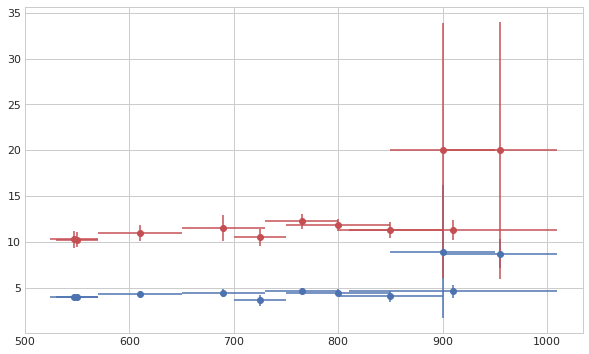

In [552]:
plt.rcParams.update({'font.size': 18, 'figure.figsize':(10,6)})
emin_an  = [524, 570, 650, 730, 800, 900, 850, 750, 700, 530, 810]
emax_an  = [570, 650, 730, 800, 900, 1010, 950, 850, 750, 570, 1010]
sigma1_an = [4.02, 4.31, 4.44, 4.66, 4.08, 8.724847949065675, 8.952093654550044, 4.509152675111134, 3.6841658856535178, 4.01709961911671, 4.628942053127934]
dsigma1_an = [0.13, 0.18, 0.44, 0.39, 0.55, 1.590062670581002, 7.270944904440277, 0.3453623743108212, 0.6048651400716212, 0.1190920659859942, 0.7016815273028718]
sigma2_an = [10.3, 10.98, 11.55, 12.25, 11.34, 19.995900427431625, 19.999882612152, 11.866375420268561, 10.53279261428423, 10.283255759137344, 11.339313291171166]
dsigma2_an = [0.9, 0.85, 1.42, 0.81, 0.89, 13.996992016425061, 13.933962567163773, 0.6617076556061905, 0.9474962757272731, 0.8289418695468278, 1.1023824322696134]
frac12_an = [3.92, 2.31, 1.76, 0.88, 0.64, 2.728843351319719, 6.911293728105318, 0.8379169741736125, 0.7006647553677061, 3.9196405944377877, 0.62839843050261]
df_sigma_an = pd.DataFrame({'emin':emin_an, 'emax':emax_an, 'sigma1':sigma1_an, 'ds1': dsigma1_an, 
                            'sigma2':sigma2_an, 'ds2': dsigma2_an, 'frac': frac12_an})
df_sigma_an['emean'] = (df_sigma_an.emin + df_sigma_an.emax)/2.
df_sigma_an['deup'] = df_sigma_an.emean - df_sigma_an.emin
plt.errorbar(data=df_sigma_an, x='emean', y='sigma1', xerr='deup', yerr='ds1', fmt='ob')
plt.errorbar(data=df_sigma_an, x='emean', y='sigma2', xerr='deup', yerr='ds2', fmt='or')

–í–∏–¥–Ω–æ, —á—Ç–æ –∫–∞–∂–¥–∞—è –∏–∑ —Å–∏–≥–º –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ —Å–¥–≤–∏–≥–∞–µ—Ç—Å—è. –ù–æ –≤–∏–¥–Ω–æ, —á—Ç–æ –Ω–∞ –º–∞–ª–æ–º –æ–±—ä—ë–º–µ –¥–∞–Ω–Ω—ã—Ö —à–∏—Ä–∏–Ω—ã –Ω–∞—á–∏–Ω–∞—é—Ç —Ä–∞—Å–ø–ª—ã–≤–∞—Ç—å—Å—è (–∑–∞–º–µ—Ç–Ω–æ –ø—Ä–∏ –≤—ã—Å–æ–∫–∏—Ö —ç–Ω–µ—Ä–≥–∏—è—Ö)

–ó–∞—Ñ–∏–∫—Å–∏—Ä—É—é —à–∏—Ä–∏–Ω—ã –Ω–∞ —Å—Ä–µ–¥–Ω–∏—Ö –±–µ–∑ —É—á—ë—Ç–∞ –≤—ã–ø–∞–≤—à–∏—Ö —Ç–æ—á–µ–∫

In [238]:
print('Sigma1:', df_sigma_an.drop([5,6]).sigma1.mean() )
print('Sigma2:', df_sigma_an.drop([5,6]).sigma2.mean() )

Sigma1: 4.261040025889923
Sigma2: 11.160193009429035


–¢–æ–≥–¥–∞ –ø—Ä–æ–≤–µ—Ä—è—é –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ, —á—Ç–æ $\sigma$ –≤ —Å–ª—É—á–∞–µ –æ–¥–Ω–æ–≥–æ –≥–∞—É—Å—Å–∞ –º–µ–Ω—è–µ—Ç—Å—è –∏–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ –º–µ–Ω—è–µ—Ç—Å—è –¥–æ–ª—è —Å–æ–±—ã—Ç–∏–π –ø–æ–¥ —É–∑–∫–∏–º –∏ —à–∏—Ä–æ–∫–∏–º –≥–∞—É—Å—Å–∞–º–∏ –º–µ–Ω—è–µ—Ç—Å—è —Å —ç–Ω–µ—Ä–≥–∏–µ–π

<ErrorbarContainer object of 3 artists>

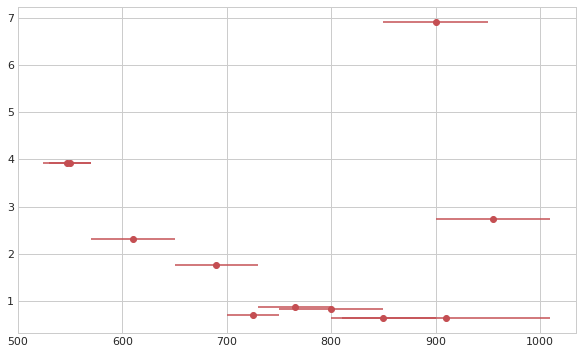

In [314]:
plt.errorbar(data=df_sigma_an, x='emean', y='frac', xerr='deup', fmt='or')

–¢–µ–ø–µ—Ä—å 2 –≥–∞—É—Å—Å–∞ –¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è (`model_new`)

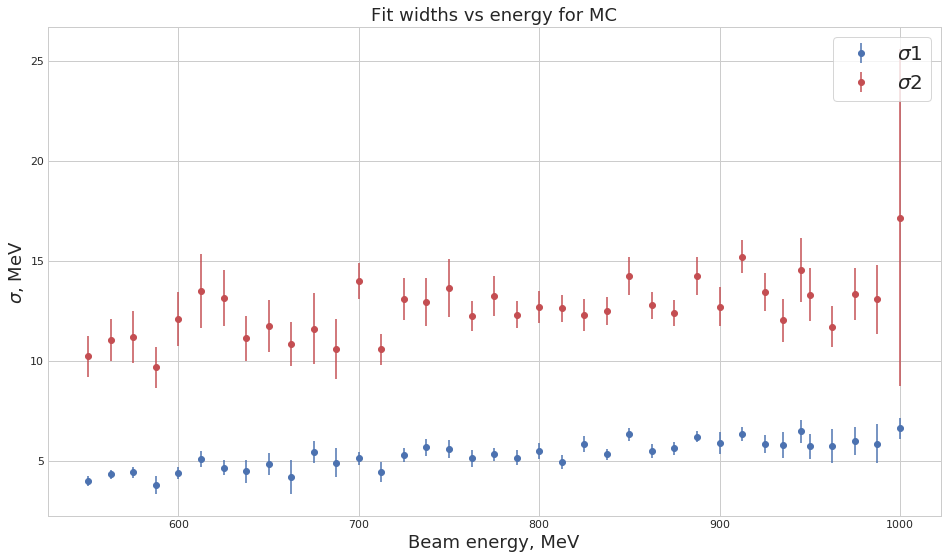

In [194]:
en_an = [ 550. ,  562.5,  575. ,  587.5,  600. ,  612.5,  625. ,  637.5,
        650. ,  662.5,  675. ,  687.5,  700. ,  712.5,  725. ,  737.5,
        750. ,  762.5,  775. ,  787.5,  800. ,  812.5,  825. ,  837.5,
        850. ,  862.5,  875. ,  887.5,  900. ,  912.5,  925. ,  935. ,
        945. ,  950. ,  962.5,  975. ,  987.5, 1000. ]
s1_an = [4.00928888, 4.33747255, 4.43559649, 3.803059  , 4.423181  ,
       5.1014904 , 4.66565474, 4.5045961 , 4.87810257, 4.1960529 ,
       5.43876272, 4.91843674, 5.14132747, 4.45975828, 5.31429813,
       5.69505078, 5.60314509, 5.14196975, 5.3540354 , 5.16952826,
       5.50877517, 4.94773543, 5.86872395, 5.33462472, 6.33305366,
       5.50748813, 5.64094449, 6.22043922, 5.8916277 , 6.35738374,
       5.86313576, 5.82890009, 6.48632741, 5.73844622, 5.75707775,
       6.0104084 , 5.87187928, 6.64138695]
s2_an = [10.24281036, 11.05319352, 11.18820377,  9.68060542, 12.08471558,
       13.48858781, 13.14961493, 11.13335416, 11.74951692, 10.83995468,
       11.62019776, 10.61195066, 13.99189698, 10.58376123, 13.09259816,
       12.95582443, 13.64101323, 12.22498239, 13.24488383, 12.3034521 ,
       12.69676957, 12.62291336, 12.27461984, 12.50987221, 14.22699406,
       12.77836884, 12.39655738, 14.23327043, 12.70892288, 15.21270754,
       13.44290652, 12.03170836, 14.54893378, 13.31082015, 11.72120822,
       13.3503376 , 13.0830581 , 17.15999921]
s1err_an = [0.24420247, 0.23628817, 0.2793554 , 0.43500637, 0.30562574,
       0.41426316, 0.36829545, 0.57240212, 0.55104936, 0.83858414,
       0.54760894, 0.72628265, 0.32523255, 0.51859386, 0.3644784 ,
       0.43592776, 0.44839775, 0.42269701, 0.32609865, 0.3645667 ,
       0.37670574, 0.36108701, 0.38803313, 0.29671017, 0.31075945,
       0.34238496, 0.33784375, 0.2866558 , 0.54865994, 0.35272085,
       0.43615359, 0.64643721, 0.55803832, 0.61537946, 0.86046785,
       0.71916831, 0.972075  , 0.51998215]
s2err_an = [1.02206463, 1.06032287, 1.28551181, 1.00666387, 1.33649728,
       1.83713476, 1.38658335, 1.13404142, 1.28373445, 1.08777375,
       1.78985585, 1.48944632, 0.89674085, 0.7724873 , 1.03681978,
       1.19733482, 1.46254629, 0.7502984 , 0.97471297, 0.6738531 ,
       0.78451445, 0.65602477, 0.80038106, 0.69198662, 0.94256228,
       0.66889848, 0.66153967, 0.94133285, 0.96653921, 0.84317584,
       0.94040895, 1.08274286, 1.57935263, 1.31951827, 1.03343693,
       1.29964889, 1.72233654, 8.39968307]
plt.errorbar(x=en_an, y=s1_an, yerr=s1err_an, fmt='ob', label='$\sigma1$')
plt.errorbar(x=en_an, y=s2_an, yerr=s2err_an, fmt='or', label='$\sigma2$')
plt.legend(frameon=True, fontsize=20);
plt.xlabel('Beam energy, MeV', fontsize=18);
plt.title('Fit widths vs energy for MC', fontsize=18)
plt.ylabel('$\sigma$, MeV', fontsize=18);
# plt.savefig('4.pdf')

–ü–æ —Å–∏–≥–º–µ –≤—Å—ë –±–æ–ª–µ–µ-–º–µ–Ω–µ–µ —Ö–æ—Ä–æ—à–æ, –∞ –≤–æ—Ç —Å–ª–µ–¥—É—é—â–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é —Å–æ–±—ã—Ç–∏–π –≤ –≥–∞—É—Å—Å–∞—Ö —Å–º—É—â–∞–µ—Ç.

–í–æ–∑–º–æ–∂–Ω–æ —ç—Ç–æ –∏–∑-–∑–∞ –∫–∞–∫–∏—Ö-—Ç–æ —Ä–∞–∑–Ω–æ–≥–ª–∞—Å–∏–π –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞, —Ö–æ—Ç–µ–ª–æ—Å—å –±—ã –≤–µ—Ä–∏—Ç—å, –Ω–æ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ

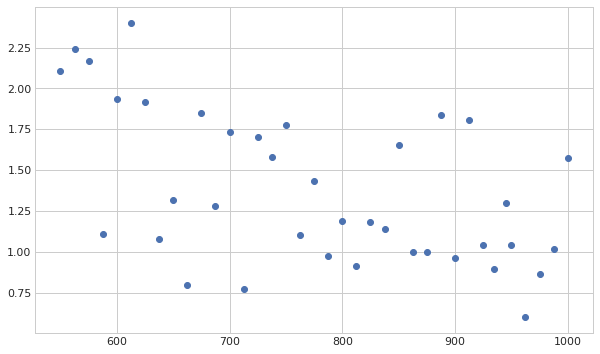

In [554]:
frac_an = [2.1047093 , 2.24281089, 2.16611316, 1.10671026, 1.93781416,
       2.39827954, 1.91504091, 1.07766751, 1.31920011, 0.79416602,
       1.84898383, 1.27802379, 1.73464467, 0.7721512 , 1.70095568,
       1.58280159, 1.77529039, 1.09981627, 1.43251272, 0.97705235,
       1.18825784, 0.9150671 , 1.18416207, 1.14115352, 1.6519543 ,
       0.99945712, 1.00099901, 1.83883042, 0.96433868, 1.8047252 ,
       1.04416522, 0.89545267, 1.29761692, 1.0409458 , 0.60057145,
       0.86444899, 1.01426618, 1.57182104]
plt.scatter(en_an, frac_an)

–°–º—É—â–∞–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –≥–∞—É—Å—Å–æ–≤, –ø–æ—ç—Ç–æ–º—É –∑–∞—Ñ–∏–∫—Å–∏—Ä—É—é –≤—Å–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –≥–∞—É—Å—Å–æ–≤ –∏–∑ –ø–æ–ª–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:

$\sigma_1 = 4.178 \pm 0.096$ , $\sigma_2 = 11.06 \pm 0.42$, $ f = 0.67 \pm 0.02$

### 17 –≥–æ–¥

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –≤—Å–µ–º —Ç–æ—á–∫–∞–º –¥–∞—ë—Ç 
$\sigma_1 = 5.77 \pm 0.56$, $\sigma_2 = 13.44 \pm 2.12$, $f = 0.61 \pm 0.1 $, $M = 498.49 \pm 0.23$

### 11 –≥–æ–¥

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –≤—Å–µ–º —Ç–æ—á–∫–∞–º –¥–∞—ë—Ç $\sigma_1 = 4.49 \pm 0.27$ , $\sigma_2 = 10.1 \pm 1.$, $ f = 0.68 \pm 0.07$. 

–Ø –≤–∑—è–ª –¥–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏ —Ä–∞–∑—Ä–µ—à–∏–ª –∏–º –≤–∞—Ä—å–∏—Ä–æ–≤–∞—Ç—å—Å—è –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –æ—à–∏–±–∫–∏

### 12 –≥–æ–¥

$\sigma_1 = 5.26 \pm 0.30$ , $\sigma_2 = 14.42 \pm 3.87$, $ f = 0.86 \pm 0.06$, $ M = 498.33 \pm 0.27$

### Model Old

$\sigma_1 = 5.43 \pm 0.10$ , $\sigma_2 = 12.68 \pm 0.25$, $ f = 0.58 \pm 0.02$, $ M = 497.05 \pm 0.04$

# Save fit info

In [723]:
fit_frame.to_csv(f'../outputs/{year}/tables/fit_frame.csv')

In [724]:
#mt.matrix(correlation=True)
#mt.draw_profile('Nsig');

In [725]:
dataN = fit_frame[['N','Nerr']]
dataN.columns = ['Nsig', 'dNsig']
dataN.index.names = ['name']

In [726]:
dataN.tail()

Nsig     dNsig
name                      
955.0  17.742746  5.370259
962.5  31.065310  6.546232
975.0  48.085055  8.556368
978.0   4.147347  2.741606
987.5  38.860393  7.475973

I have got table with events numbers

Now, I will get rid of m-field in the data table (because, I have used it)

In [727]:
data_info = final_data.drop_duplicates(['name','lum']).drop(['mass', 'trigger'], axis=1).set_index('name')

In [728]:
dataN = data_info.join(dataN, how='inner')
dataN

lum  dEmin  dEmax   Emean         Nsig      dNsig
name                                                         
537.5  1224.660    0.0    0.0  537.45  1919.884004  44.627247
550.0  1424.270    0.0    0.0  549.34  1302.274490  37.041503
550.1   496.833    0.0    0.0  549.67   421.398611  21.204146
562.5  1048.680    0.0    0.0  562.50   642.852008  25.972599
575.0  1054.350    0.0    0.0  574.86   493.265484  22.692926
587.5  1167.380    0.0    0.0  587.73   355.912529  19.515486
600.0  1161.830    0.0    0.0  599.89   257.174753  16.768352
612.5  1059.040    0.0    0.0  612.51   183.588818  14.167416
612.6  1179.140    0.0    0.0  612.61   245.810174  16.244589
625.0  1091.900    0.0    0.0  624.61   183.039409  14.148704
637.5  1021.190    0.0    0.0  637.05   113.636321  11.125186
641.0  6291.370    0.0    0.0  640.92   786.665289  29.565129
650.0   954.102    0.0    0.0  649.96    95.970111  10.008995
662.5  1109.240    0.0    0.0  662.29    98.502450  10.647587
675.0  1139.350    0.0    0.0  674.79    91.674619   9.757131
687.5  1147.480    0.0    0.0  687.11    73.832344   9.130533
700.0  1007.510    0.0    0.0  699.86    45.884010   7.041193
712.5  1010.500    0.0    0.0  712.59    64.440756   8.691308
725.0  1333.800    0.0    0.0  725.50    67.206443   8.541965
737.5   954.895    0.0    0.0  737.36    64.775375   8.338589
750.0  1045.600    0.0    0.0  750.02   108.839013  11.251274
762.0  1367.320    0.0    0.0  762.80   164.504755  13.687610
775.0   989.271    0.0    0.0  774.99   118.223633  11.960031
787.5  1260.240    0.0    0.0  787.42   214.702075  15.316340
800.0  1432.310    0.0    0.0  799.85   257.442851  17.429929
812.5  1890.390    0.0    0.0  812.62   383.189855  20.921169
825.0  1503.730    0.0    0.0  824.41   281.110019  18.325343
837.5  1067.520    0.0    0.0  837.53   141.654552  12.560748
850.0  1009.590    0.0    0.0  850.21    68.873023  10.144322
862.5  1040.170    0.0    0.0  861.52    25.404213   5.826216
875.0  1019.520    0.0    0.0  874.87    28.411684   6.930951
887.5   984.871    0.0    0.0  887.52    11.502657   4.165385
900.0  1060.930    0.0    0.0  900.51     9.217894   3.370235
912.5  1023.070    0.0    0.0  913.38     5.492667   3.345966
925.0  1056.930    0.0    0.0  925.59    12.845793   3.999066
936.0  1902.530    0.0    0.0  936.24    22.068434   5.376740
945.0  2303.930    0.0    0.0  944.83    26.390406   6.304272
950.0  1962.570    0.0    0.0  950.15    17.811294   5.591026
951.1  2134.050    0.0    0.0  951.04    28.524704   6.451670
955.0  1254.610    0.0    0.0  956.05    17.742746   5.370259
962.5  2004.700    0.0    0.0  962.82    31.065310   6.546232
975.0  3972.320    0.0    0.0  972.88    48.085055   8.556368
978.0   451.273    0.0    0.0  976.21     4.147347   2.741606
987.5  2272.430    0.0    0.0  987.80    38.860393   7.475973

In [729]:
check_foo(dataN, fit_frame)

Good. 44 rows


OK, save it

In [730]:
dataN.to_csv(f'../outputs/{year}/tables/signal_table{year}.csv', float_format='%.2f')

Ok, now about triggers

In [731]:
triggers = final_data[['trigger','name']].set_index('name')
triggers = triggers.assign(one = 1);

In [732]:
triggers

trigger  one
name               
537.5        2    1
537.5        2    1
537.5        2    1
537.5        0    1
537.5        2    1
...        ...  ...
987.5        2    1
987.5        2    1
987.5        2    1
987.5        2    1
987.5        2    1

[10580 rows x 2 columns]

In [733]:
check_foo(triggers, final_data)

Good. 10580 rows


In [734]:
triggers = pd.pivot_table(triggers, values='one', columns=['trigger'], index='name', aggfunc=np.sum).fillna(0)

In [735]:
triggers.columns = ['TF', 'CF', 'TC']

In [736]:
triggers.head()

TF    CF      TC
name                      
537.5  453.0  20.0  1549.0
550.0  312.0  17.0  1076.0
550.1  113.0   9.0   332.0
562.5  171.0   9.0   507.0
575.0   64.0  19.0   442.0

In [737]:
def variance(k, n):
    return (k+1)*(k+2)/(n+2)/(n+3) - (k+1)**2/(n+2)**2

In [738]:
triggers['eTF'] = (triggers['TC'] + 1)/(triggers['CF'] + triggers['TC'] + 2)
triggers['eCF'] = (triggers['TC'] + 1)/(triggers['TF'] + triggers['TC'] + 2)
triggers['TrigEff'] = 1 - (1-triggers['eTF'])*(1-triggers['eCF'])

triggers['vTF'] = np.sqrt( variance(triggers['TC'], triggers['CF'] + triggers['TC']) )
triggers['vCF'] = np.sqrt( variance(triggers['TC'], triggers['TF'] + triggers['TC']) )
triggers['TrigErr'] = np.sqrt( np.square((1-triggers['eTF'])*triggers['vCF']) + 
                              np.square((1-triggers['eCF'])*triggers['vTF']) )

OK, trigers have been got

In [739]:
check_foo(triggers, dataN)

Good. 44 rows


In [740]:
triggers.to_csv(f'../outputs/{year}/tables/triggers{year}.csv', float_format='%.4f')

In [741]:
triggers

TF    CF      TC       eTF       eCF   TrigEff       vTF       vCF  \
name                                                                           
537.5  453.0  20.0  1549.0  0.986633  0.773453  0.996972  0.002896  0.009348   
550.0  312.0  17.0  1076.0  0.983562  0.774820  0.996298  0.003841  0.011200   
550.1  113.0   9.0   332.0  0.970845  0.744966  0.992565  0.009071  0.020593   
562.5  171.0   9.0   507.0  0.980695  0.747059  0.995117  0.006040  0.016658   
575.0   64.0  19.0   442.0  0.956803  0.872047  0.994473  0.009438  0.014806   
587.5   32.0  10.0   346.0  0.969274  0.913158  0.997332  0.009108  0.014427   
600.0   14.0  15.0   253.0  0.940741  0.944238  0.996696  0.014343  0.013965   
612.5   10.0   5.0   181.0  0.968085  0.943005  0.998181  0.012786  0.016645   
612.6   16.0   9.0   240.0  0.960159  0.934109  0.997375  0.012321  0.015416   
625.0   14.0   5.0   181.0  0.968085  0.923858  0.997570  0.012786  0.018849   
637.5    6.0   3.0   117.0  0.967213  0.944000  0.998164  0.016057  0.020483   
641.0   55.0  45.0   763.0  0.943210  0.931707  0.996122  0.008127  0.008803   
650.0    4.0   2.0    98.0  0.970588  0.951923  0.998586  0.016648  0.020877   
662.5    7.0   4.0   102.0  0.953704  0.927928  0.996663  0.020126  0.024436   
675.0    8.0   1.0    87.0  0.977778  0.907216  0.997938  0.015452  0.029307   
687.5    4.0   2.0    82.0  0.965116  0.943182  0.998018  0.019672  0.024538   
700.0    7.0   0.0    44.0  0.978261  0.849057  0.996719  0.021272  0.048717   
712.5    1.0   2.0    70.0  0.959459  0.972603  0.998889  0.022773  0.018976   
725.0    4.0   1.0    69.0  0.972222  0.933333  0.998148  0.019234  0.028613   
737.5    4.0   1.0    63.0  0.969697  0.927536  0.997804  0.020942  0.030987   
750.0    8.0   6.0   107.0  0.939130  0.923077  0.995318  0.022199  0.024530   
762.0    5.0   5.0   167.0  0.965517  0.965517  0.998811  0.013793  0.013793   
775.0    6.0   3.0   130.0  0.970370  0.949275  0.998497  0.014540  0.018612   
787.5   11.0   3.0   215.0  0.981818  0.947368  0.999043  0.008987  0.014756   
800.0   16.0   7.0   279.0  0.972222  0.942761  0.998410  0.009667  0.013457   
812.5   12.0   8.0   400.0  0.978049  0.968599  0.999311  0.007228  0.008561   
825.0   16.0   3.0   287.0  0.986301  0.944262  0.999236  0.006791  0.013115   
837.5    2.0   5.0   147.0  0.961039  0.980132  0.999226  0.015542  0.011319   
850.0    0.0   0.0    92.0  0.989362  0.989362  0.999887  0.010526  0.010526   
862.5    4.0   3.0    38.0  0.906977  0.886364  0.989429  0.043789  0.047311   
875.0    0.0   2.0    47.0  0.941176  0.979592  0.998800  0.032629  0.019996   
887.5    1.0   2.0    23.0  0.888889  0.923077  0.991453  0.059391  0.051282   
900.0    0.0   0.0    16.0  0.944444  0.944444  0.996914  0.052550  0.052550   
912.5    1.0   2.0    17.0  0.857143  0.900000  0.985714  0.074605  0.065465   
925.0    0.0   0.0    20.0  0.954545  0.954545  0.997934  0.043433  0.043433   
936.0    1.0   2.0    38.0  0.928571  0.951220  0.996516  0.039274  0.033238   
945.0    0.0   3.0    46.0  0.921569  0.979167  0.998366  0.037283  0.020404   
950.0    0.0   3.0    28.0  0.878788  0.966667  0.995960  0.055973  0.032240   
951.1    0.0   2.0    44.0  0.937500  0.978261  0.998641  0.034580  0.021272   
955.0    2.0   2.0    25.0  0.896552  0.896552  0.989298  0.055602  0.055602   
962.5    1.0   1.0    39.0  0.952381  0.952381  0.997732  0.032476  0.032476   
975.0    2.0   0.0    83.0  0.988235  0.965517  0.999594  0.011627  0.019451   
978.0    0.0   0.0     7.0  0.888889  0.888889  0.987654  0.099381  0.099381   
987.5    1.0   3.0    51.0  0.928571  0.962963  0.997354  0.034112  0.025465   

        TrigErr  
name             
537.5  0.000668  
550.0  0.000884  
550.1  0.002390  
562.5  0.001561  
575.0  0.001367  
587.5  0.000907  
600.0  0.001151  
612.5  0.000902  
612.6  0.001018  
625.0  0.001144  
637.5  0.001122  
641.0  0.000747  
650.0  0.001009  
662.5  0.001840  
675.0  0.001575  
687.5  0.001408  
700.0

### Check triggers

In [335]:
trig_data = pd.read_csv('../outputs/11/tables/triggers11.csv')

In [336]:
trig_data

name     TF     CF     TC     eTF     eCF  TrigEff     vTF     vCF  \
0   525.0  319.0  384.0  154.0  0.2870  0.3263   0.5197  0.0194  0.0215   
1   537.5  510.0   20.0  393.0  0.9494  0.4354   0.9714  0.0107  0.0165   
2   550.0  235.0   62.0  103.0  0.6228  0.3059   0.7381  0.0374  0.0250   
3   562.5  237.0    9.0  170.0  0.9448  0.4181   0.9679  0.0169  0.0244   
4   575.0   97.0   27.0   45.0  0.6216  0.3194   0.7425  0.0560  0.0387   
5   587.5  107.0    4.0   76.0  0.9390  0.4162   0.9644  0.0263  0.0361   
6   600.0   45.0   25.0   27.0  0.5185  0.3784   0.7007  0.0674  0.0560   
7   612.5   75.0    4.0   52.0  0.9138  0.4109   0.9492  0.0365  0.0432   
8   625.0   27.0    3.0   13.0  0.7778  0.3333   0.8519  0.0954  0.0719   
9   637.5   49.0    0.0   27.0  0.9655  0.3590   0.9779  0.0333  0.0540   
10  650.0   32.0    3.0   17.0  0.8182  0.3529   0.8824  0.0804  0.0663   
11  662.5   18.0    0.0   17.0  0.9474  0.4865   0.9730  0.0499  0.0811   
12  675.0   24.0    3.0   10.0  0.7333  0.3056   0.8148  0.1106  0.0757   
13  687.5    6.0    0.0    2.0  0.7500  0.3000   0.8250  0.1936  0.1382   
14  700.0   12.0    1.0    9.0  0.8333  0.4348   0.9058  0.1034  0.1012   
15  712.5   14.0    0.0   13.0  0.9333  0.4828   0.9655  0.0624  0.0912   
16  725.0    9.0    0.0   10.0  0.9167  0.5238   0.9603  0.0767  0.1065   
17  737.5   17.0    1.0    6.0  0.7778  0.2800   0.8400  0.1315  0.0881   
18  750.0   20.0    0.0   16.0  0.9444  0.4474   0.9693  0.0526  0.0796   
19  762.5   32.0    0.0   21.0  0.9565  0.4000   0.9739  0.0416  0.0655   
20  775.0   24.0    3.0   30.0  0.8857  0.5536   0.9490  0.0530  0.0658   
21  787.5   28.0    1.0   43.0  0.9565  0.6027   0.9827  0.0297  0.0569   
22  800.0   32.0    2.0   34.0  0.9211  0.5147   0.9617  0.0432  0.0602   
23  812.5   30.0    1.0   41.0  0.9545  0.5753   0.9807  0.0311  0.0575   
24  825.0   23.0    3.0   19.0  0.8333  0.4545   0.9091  0.0745  0.0742   
25  837.5   34.0    2.0   31.0  0.9143  0.4776   0.9552  0.0467  0.0606   
26  850.0    7.0    0.0   18.0  0.9500  0.7037   0.9852  0.0476  0.0863   
27  862.5   14.0    0.0   12.0  0.9286  0.4643   0.9617  0.0665  0.0926   
28  875.0   10.0    0.0    8.0  0.9000  0.4500   0.9450  0.0905  0.1086   
29  910.0   13.0    1.0   15.0  0.8889  0.5333   0.9481  0.0721  0.0896   
30  950.0   13.0    1.0    7.0  0.8000  0.3636   0.8727  0.1206  0.1003   

    TrigErr  
0    0.0202  
1    0.0061  
2    0.0276  
3    0.0099  
4    0.0408  
5    0.0155  
6    0.0498  
7    0.0218  
8    0.0656  
9    0.0214  
10   0.0534  
11   0.0260  
12   0.0794  
13   0.1399  
14   0.0608  
15   0.0328  
16   0.0376  
17   0.0967  
18   0.0294  
19   0.0251  
20   0.0248  
21   0.0121  
22   0.0215  
23   0.0134  
24   0.0425  
25   0.0249  
26   0.0147  
27   0.0362  
28   0.0509  
29   0.0351  
30   0.0793